In [13]:
import sys
!{sys.executable} -m pip install mlxtend

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
train_df=pd.read_csv("C:/Users/priya/OneDrive/Desktop/House Price Pred/train.csv")
test_df=pd.read_csv("C:/Users/priya/OneDrive/Desktop/House Price Pred/test.csv")

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


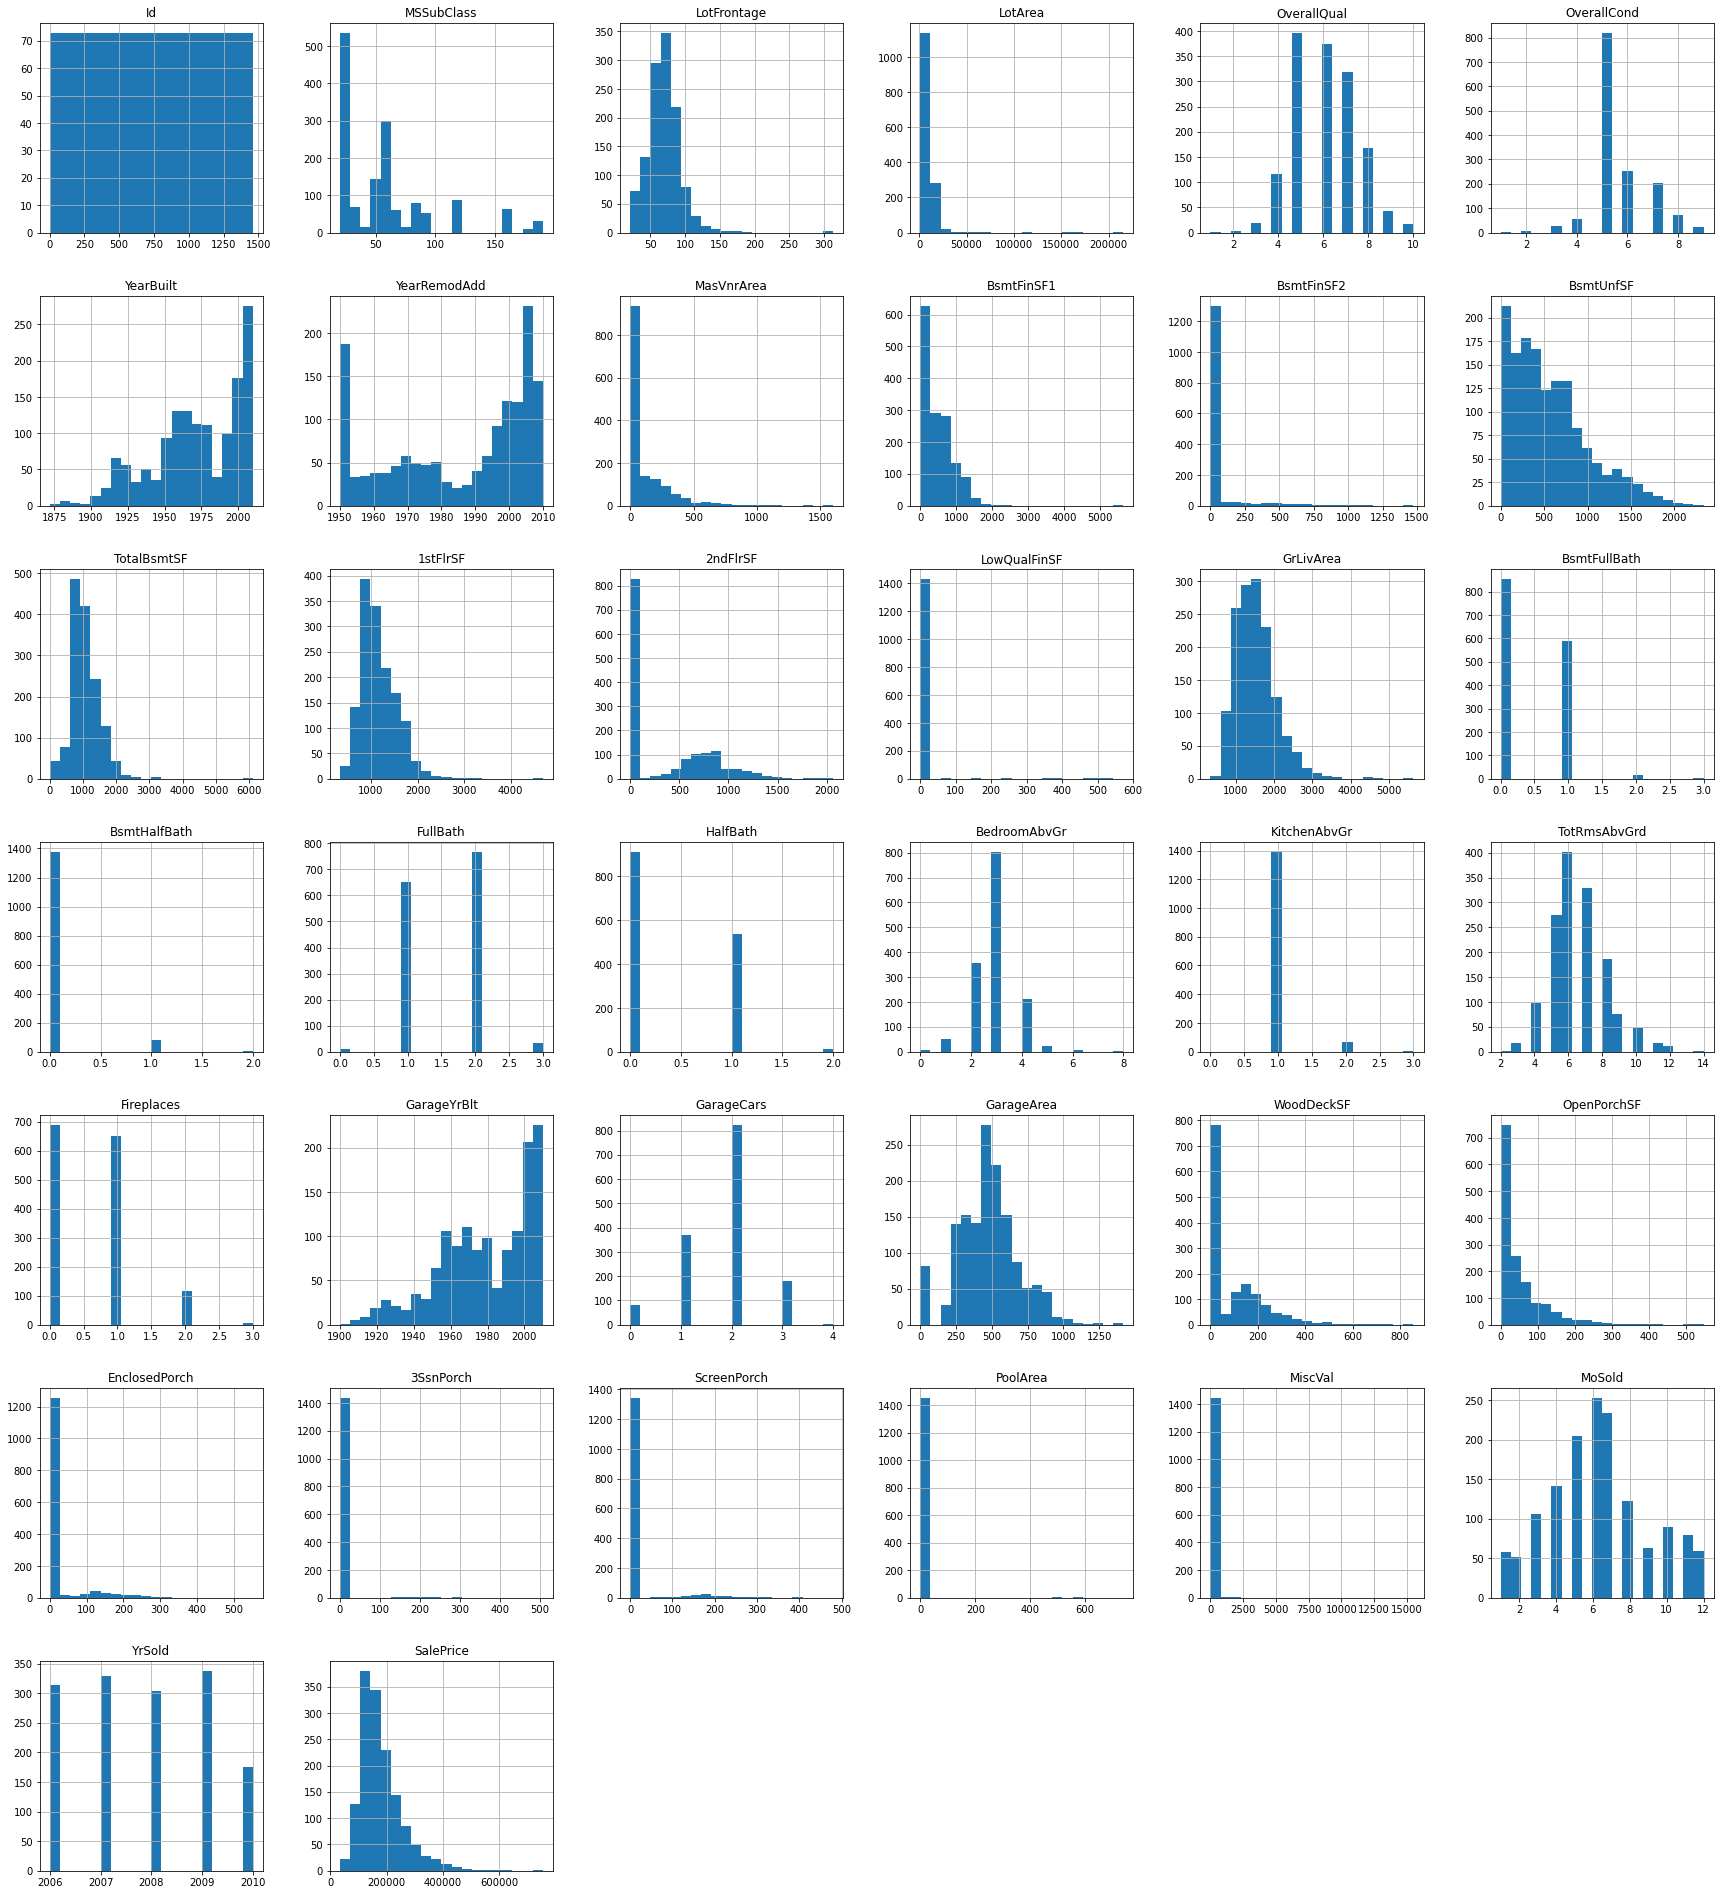

In [10]:
train_df.hist(figsize=(30,34),bins=20,legend=False)
plt.show()

In [11]:
print(train_df["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [12]:
train_df["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [13]:
print("Skewness: ",train_df["SalePrice"].skew())

Skewness:  1.8828757597682129


In [14]:
print("Kurtosis: ",train_df["SalePrice"].kurt())

Kurtosis:  6.536281860064529


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

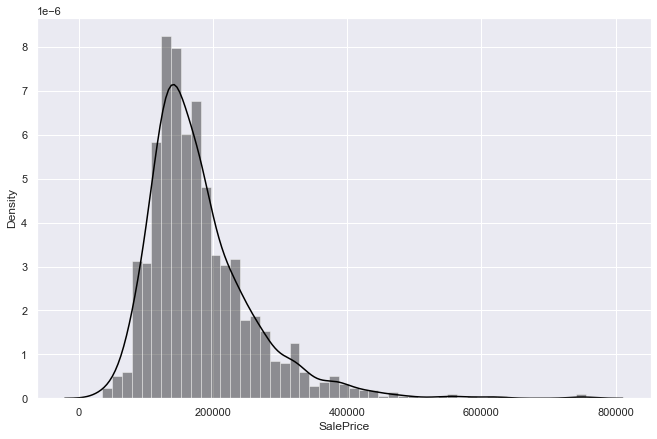

In [15]:
sns.set(rc={"figure.figsize" : (11,7)})
sns.distplot(train_df["SalePrice"],color="black")

In [16]:
train_df["SalePrice"]=np.log1p(train_df["SalePrice"])
train_df["SalePrice"].head(10)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
5    11.870607
6    12.634606
7    12.206078
8    11.774528
9    11.678448
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

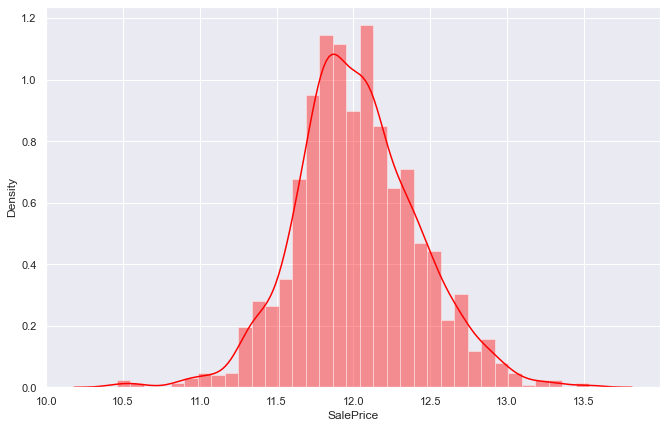

In [17]:
sns.distplot(train_df["SalePrice"],color="red")

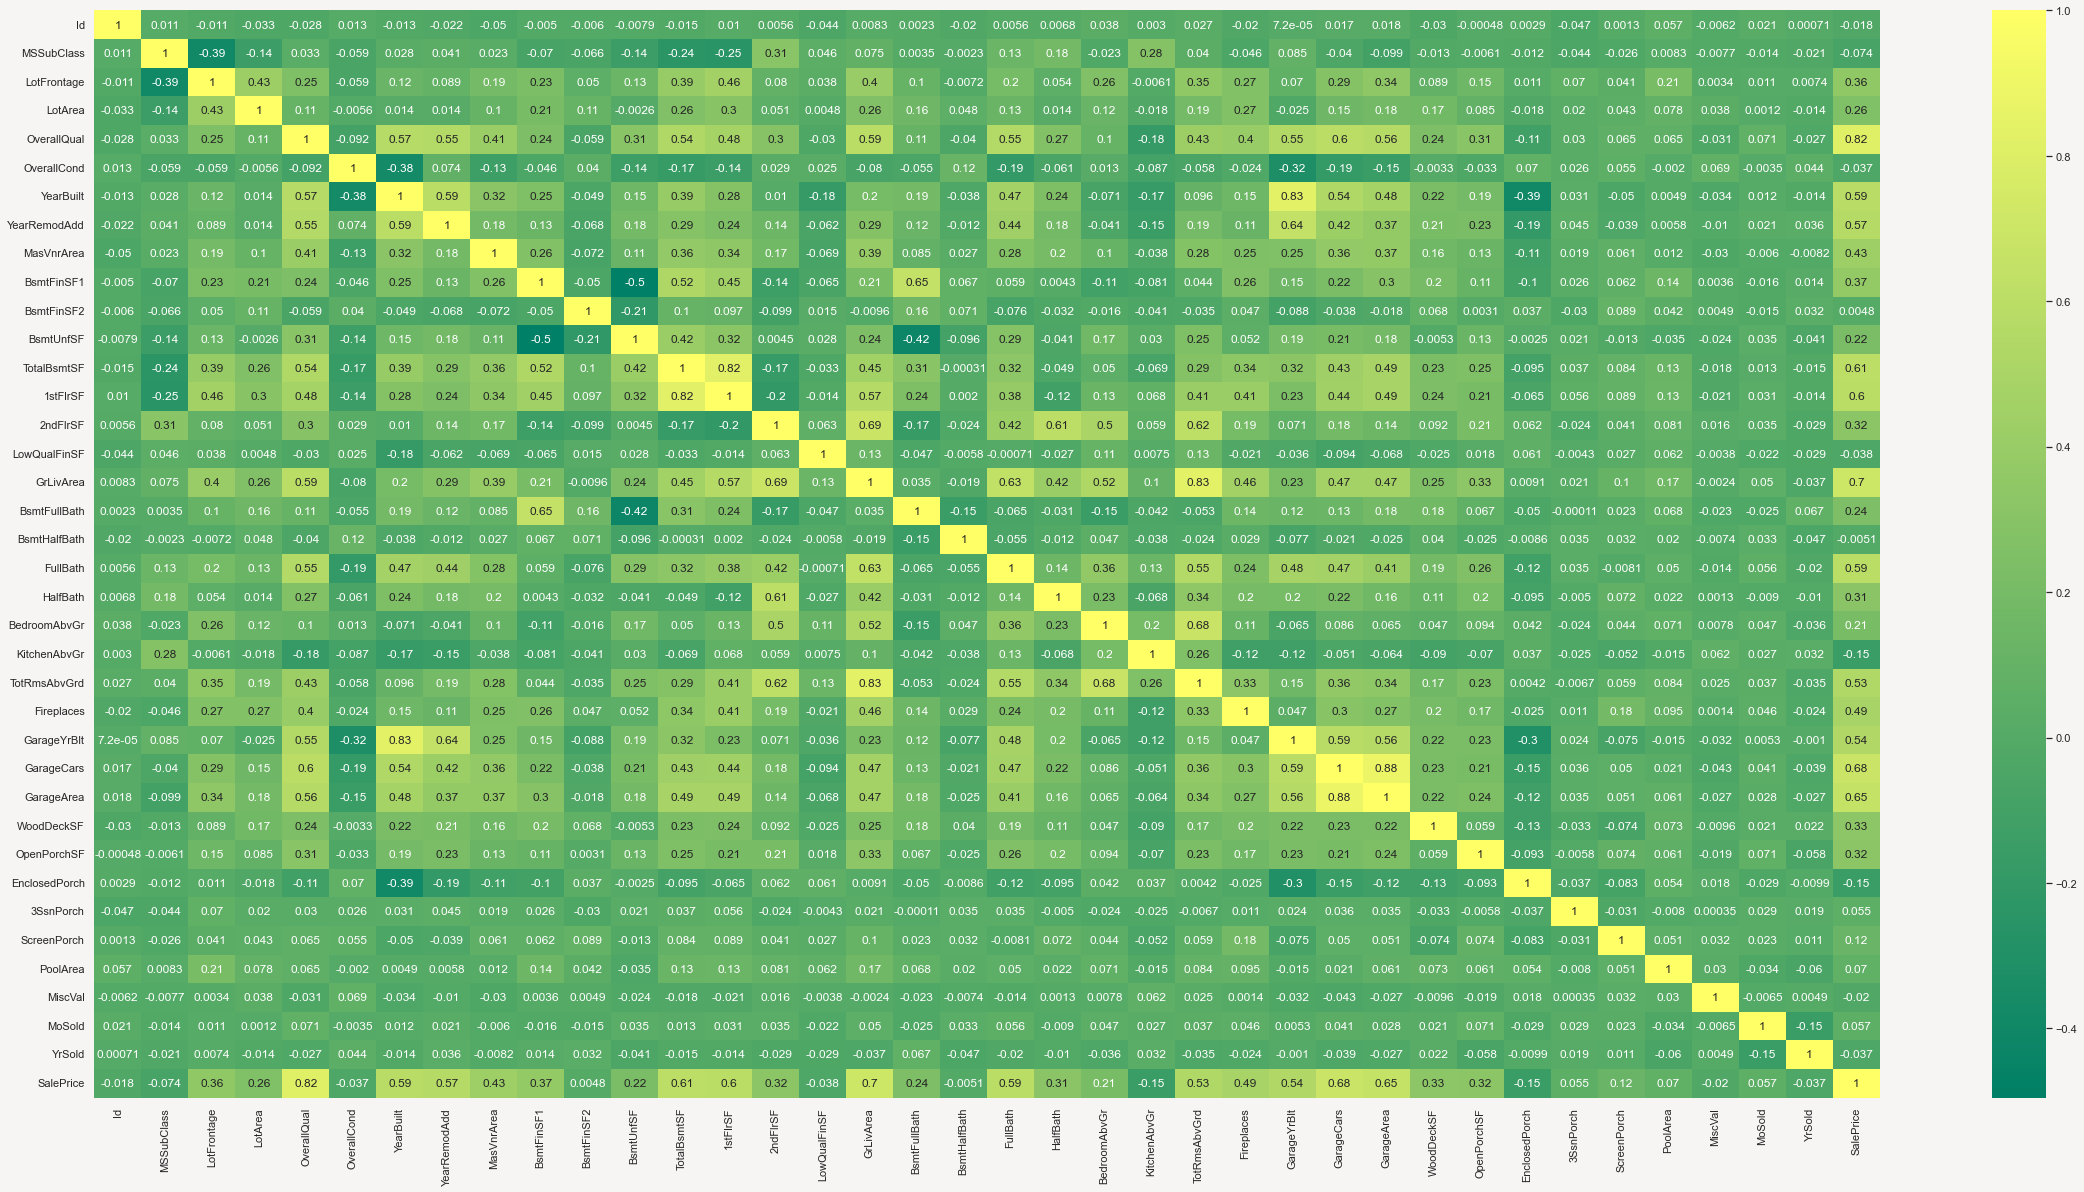

In [18]:
plt.figure(figsize = [40, 20], facecolor = "#F7F4F4")
sns.heatmap(train_df.corr(), annot = True, cmap = "summer");

In [19]:
correlation_df = train_df.corr()
high_correlation_variables = correlation_df.index[abs(correlation_df["SalePrice"]) > 0.4]
high_correlation_variables

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

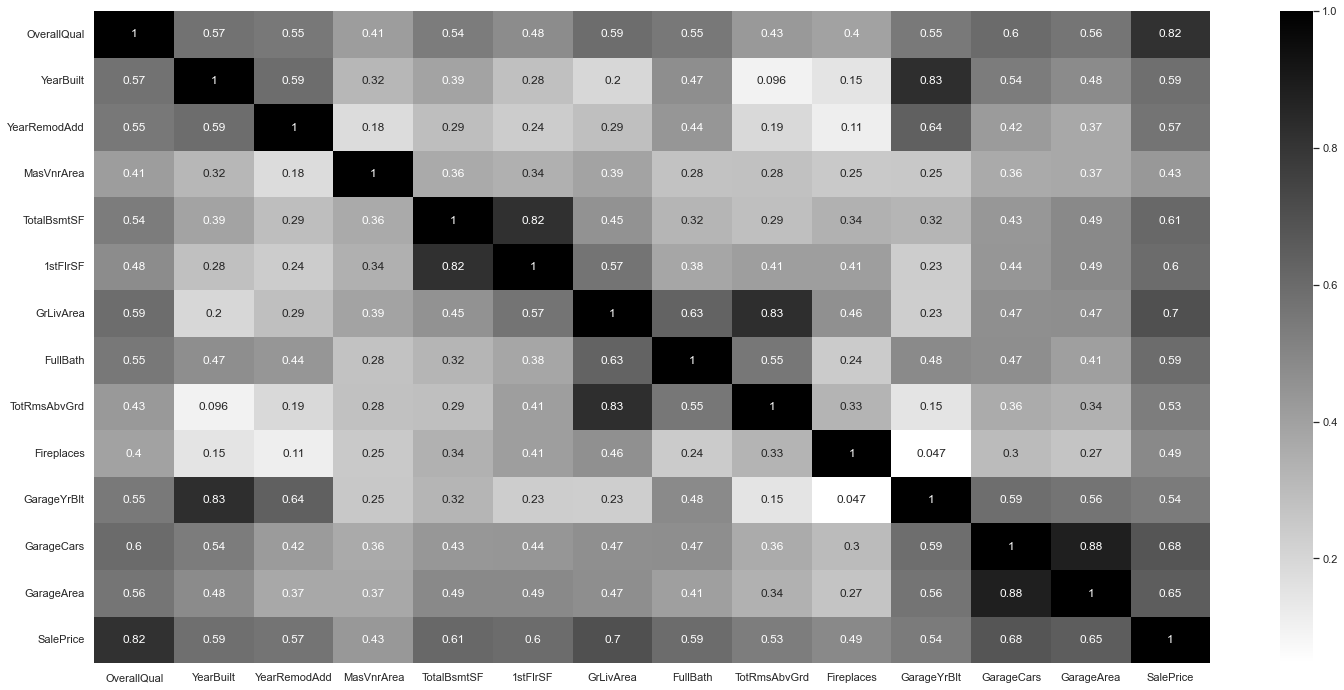

In [20]:
plt.figure(figsize = (25, 12))
sns.heatmap(train_df[high_correlation_variables].corr(), annot = True, cmap = "binary");

In [21]:
train_df[high_correlation_variables].corr()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.411876,0.537808,0.476224,0.593007,0.550600,0.427452,0.396765,0.547766,0.600671,0.562022,0.817185
YearBuilt,0.572323,1.000000,0.592855,0.315707,0.391452,0.281986,0.199010,0.468271,0.095589,0.147716,0.825667,0.537850,0.478954,0.586570
YearRemodAdd,0.550684,0.592855,1.000000,0.179618,0.291066,0.240379,0.287389,0.439046,0.191740,0.112581,0.642277,0.420622,0.371600,0.565608
MasVnrArea,0.411876,0.315707,0.179618,1.000000,0.363936,0.344501,0.390857,0.276833,0.280682,0.249070,0.252691,0.364204,0.373066,0.430809
TotalBsmtSF,0.537808,0.391452,0.291066,0.363936,1.000000,0.819530,0.454868,0.323722,0.285573,0.339519,0.322445,0.434585,0.486665,0.612134
1stFlrSF,0.476224,0.281986,0.240379,0.344501,0.819530,1.000000,0.566024,0.380637,0.409516,0.410531,0.233449,0.439317,0.489782,0.596981
GrLivArea,0.593007,0.199010,0.287389,0.390857,0.454868,0.566024,1.000000,0.630012,0.825489,0.461679,0.231197,0.467247,0.468997,0.700927
FullBath,0.550600,0.468271,0.439046,0.276833,0.323722,0.380637,0.630012,1.000000,0.554784,0.243671,0.484557,0.469672,0.405656,0.594771
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.280682,0.285573,0.409516,0.825489,0.554784,1.000000,0.326114,0.148112,0.362289,0.337822,0.534422
Fireplaces,0.396765,0.147716,0.112581,0.249070,0.339519,0.410531,0.461679,0.243671,0.326114,1.000000,0.046822,0.300789,0.269141,0.489450


In [22]:
variables = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
for var in variables:
    print("Correlation coefficient:", train_df["SalePrice"].corr(train_df[var]))

Correlation coefficient: 0.8171846144867662
Correlation coefficient: 0.7009269871427151
Correlation coefficient: 0.6806248726581909
Correlation coefficient: 0.6121342283262257
Correlation coefficient: 0.5947706649972533
Correlation coefficient: 0.5865701927897159


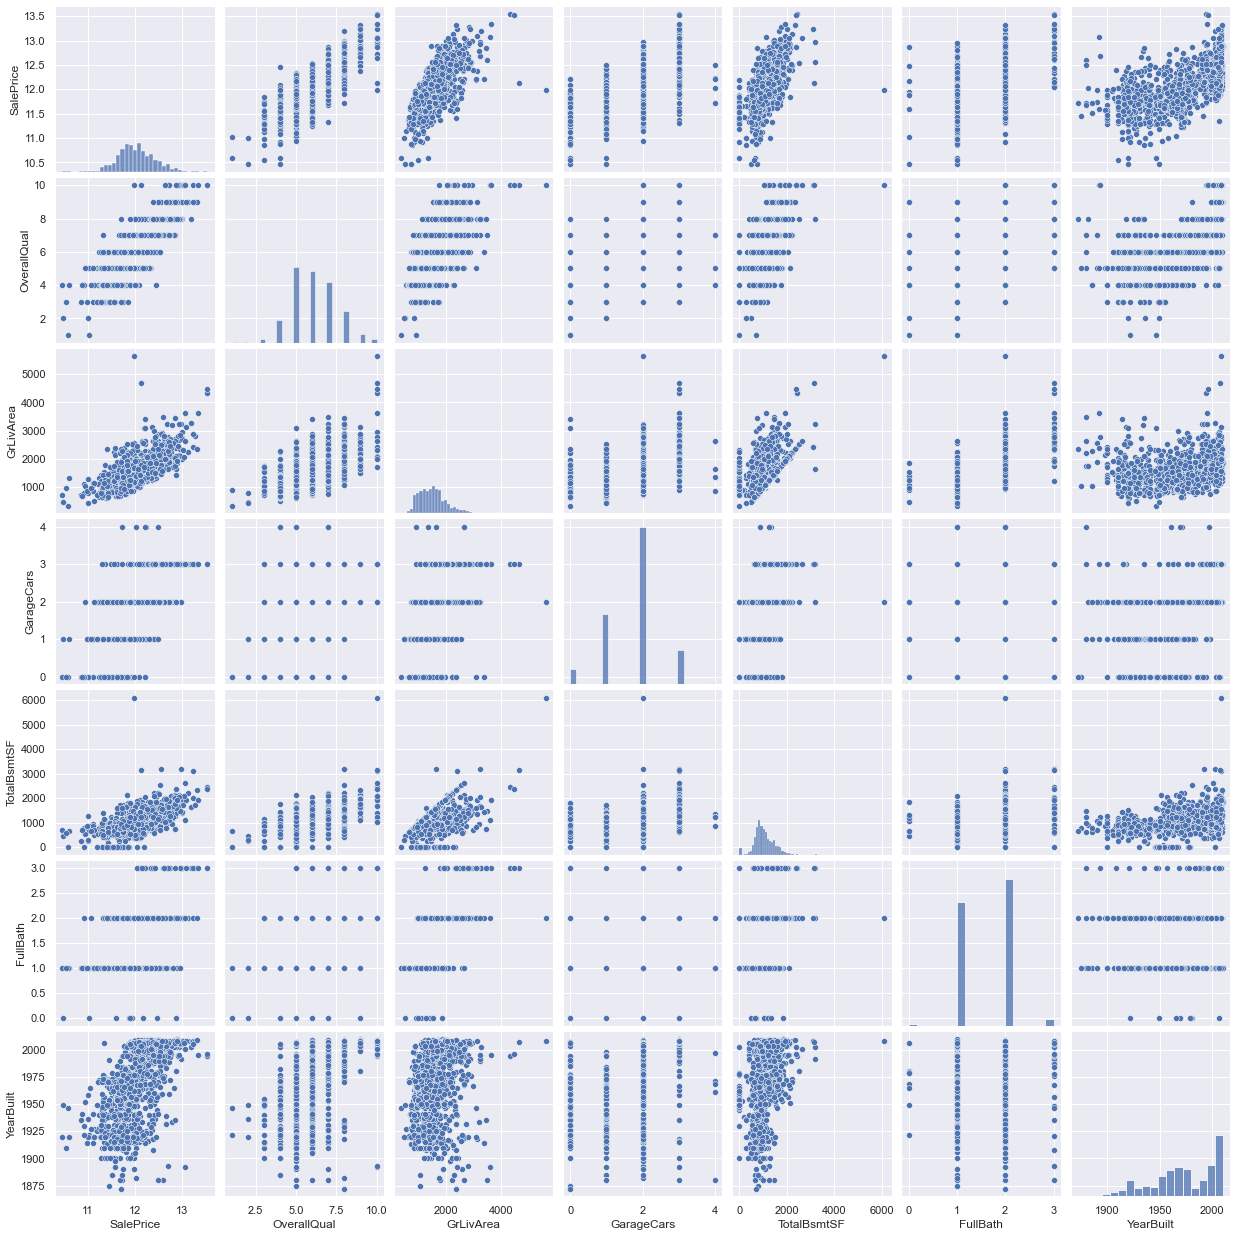

In [23]:
variables = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(train_df[variables]);

In [24]:
from collections import Counter

In [25]:
def outlier_detection_train(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection_train(train_df, 5, train_df.select_dtypes(["float", "int"]).columns)
train_df.drop(will_drop_train, inplace = True, axis = 0)

In [26]:
y_train = train_df["SalePrice"]

In [27]:
train_and_test_df = pd.concat([train_df, test_df], axis = 0)
train_and_test_df = train_and_test_df.drop(["Id", "SalePrice"], axis = 1)

In [28]:
number_of_missing_df = train_and_test_df.isnull().sum().sort_values(ascending = False)
percent_of_missing_df = ((train_and_test_df.isnull().sum() / train_and_test_df.isnull().count())*100).sort_values(ascending = False)

In [29]:
missing_df = pd.concat([number_of_missing_df,
                        percent_of_missing_df],
                        keys = ["total number of missing data", 'total percent of missing data'],
                        axis = 1)


print(missing_df.head(20))

              total number of missing data  total percent of missing data
PoolQC                                2880                      99.792100
MiscFeature                           2786                      96.534997
Alley                                 2690                      93.208593
Fence                                 2322                      80.457380
FireplaceQu                           1415                      49.029799
LotFrontage                            476                      16.493416
GarageYrBlt                            155                       5.370755
GarageFinish                           155                       5.370755
GarageQual                             155                       5.370755
GarageCond                             155                       5.370755
GarageType                             153                       5.301455
BsmtExposure                            81                       2.806653
BsmtCond                              

In [30]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [31]:
import missingno as msno

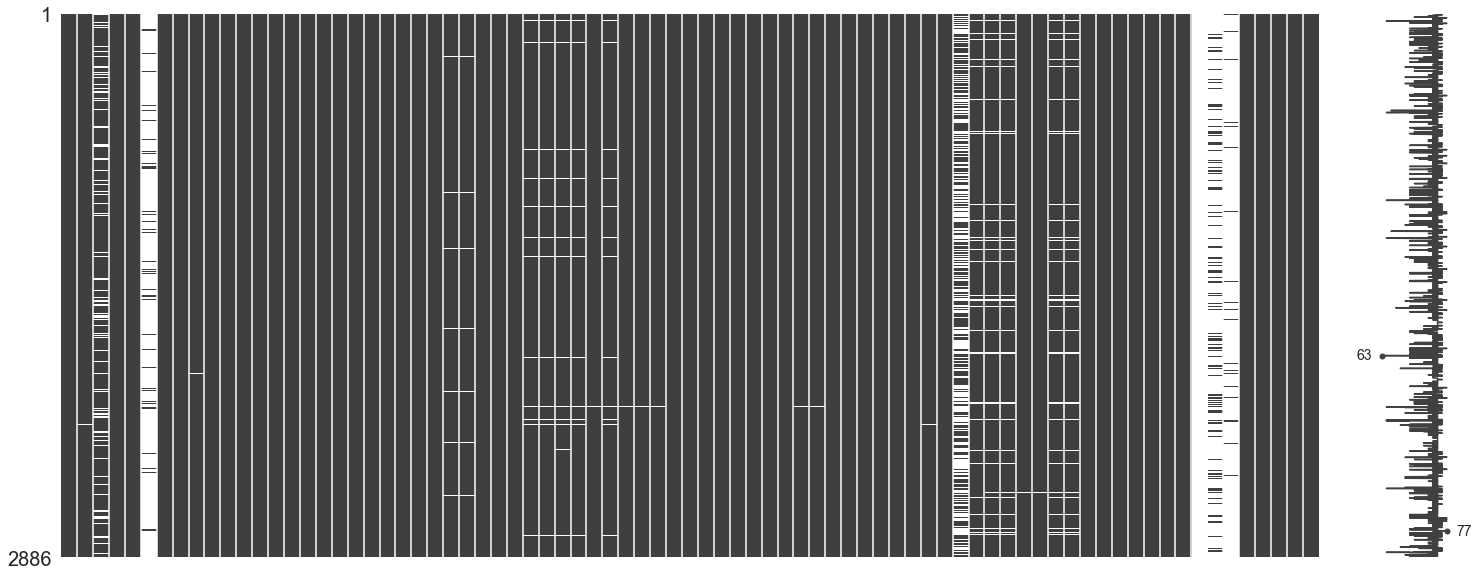

In [32]:
msno.matrix(train_and_test_df);

In [33]:
train_and_test_df = train_and_test_df.drop((missing_df[missing_df["total number of missing data"] > 100]).index, axis = 1)
train_and_test_df.isnull().sum().sort_values(ascending = False)

BsmtExposure     81
BsmtCond         81
BsmtQual         80
BsmtFinType2     79
BsmtFinType1     78
                 ..
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
SaleCondition     0
Length: 68, dtype: int64

In [34]:
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_and_test_df.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].median(), inplace = True)
        
for col in categoric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].value_counts().index[0], inplace = True)

In [35]:
train_and_test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 68, dtype: int64

In [36]:
from scipy.stats import norm, skew

In [37]:
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]

vars_skewed = train_and_test_df[numeric_data].apply(lambda x: skew(x)).sort_values()

In [38]:
for var in vars_skewed.index:
    train_and_test_df[var] = np.log1p(train_and_test_df[var])

In [39]:
train_and_test_df = train_and_test_df.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"],
                                          axis = 1)

In [40]:
train_and_test_df = pd.get_dummies(train_and_test_df, drop_first = True)
train_and_test_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,...,0,0,0,0,1,0,0,0,1,0


In [41]:
x_train = train_and_test_df[:len(train_df)]
x_test = train_and_test_df[len(train_df):]

In [42]:
x_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,...,0,0,0,0,1,0,0,0,1,0


In [43]:
x_train.shape

(1427, 210)

In [44]:
y_train.shape

(1427,)

In [45]:
x_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,5.602119,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,6.008813,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,4.927254,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,9.208238,1.945910,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,5.783825,...,0,0,0,0,1,0,0,0,1,0
4,4.795791,8.518392,2.197225,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,6.925595,...,0,0,0,0,1,0,0,0,1,0


In [46]:
x_test.shape

(1459, 210)

In [47]:
k_fold = KFold(n_splits = 15, random_state = 11, shuffle = True)

In [48]:
def cv_rmse(model, X = x_train):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring = "neg_mean_squared_error", cv = k_fold))
    return rmse


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred, squared = False))

In [49]:
xgb = make_pipeline(RobustScaler(),
                    XGBRegressor(colsample_bytree = 0.5, n_estimators = 6000,
                                 max_depth = 4, learning_rate = 0.01, gamma = 0.45,
                                 subsample = 0.5, random_state = 11, reg_alpha = 0.00006,
                                 reg_lambda = None, nthread = -1))

In [50]:
score = cv_rmse(xgb)
print("Xgboost model's cross validation score: ", score.mean())

Xgboost model's cross validation score:  0.12900639939811287


In [51]:
lgbm = make_pipeline(RobustScaler(),
                     LGBMRegressor(num_leaves = 6, bagging_fraction = 0.7,
                                   bagging_freq = 4, min_sum_hessian_in_leaf = 11,
                                   learning_rate = 0.01, n_estimators = 7500, max_bin = 200,
                                   random_state = 11))

In [52]:
score = cv_rmse(lgbm)
print("Light GBM model's cross validation score: ", score.mean())

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning

In [53]:
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas = [1e-10, 1e-8, 1e-5, 1e-2, 9e-4,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30, 
                                                        45, 50, 70, 90], cv = k_fold))

In [54]:
score = cv_rmse(ridge)
print("Ridge model's cross validation score: ", score.mean())

Ridge model's cross validation score:  0.11203086894383095


In [55]:
lasso = make_pipeline(RobustScaler(),
                      LassoCV(alphas = [1e-10, 1e-8, 1e-5, 1e-2, 9e-4,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30,
                                                        45, 50, 70, 90], n_jobs = -1, cv = k_fold))

In [56]:
score = cv_rmse(lasso)
print("Lasso model's cross validation score: ", score.mean())

Lasso model's cross validation score:  0.11292515129462093


In [57]:
gbr = make_pipeline(RobustScaler(),
                    GradientBoostingRegressor(n_estimators = 7000, learning_rate = 0.01,
                                              max_depth = 5, min_samples_split = 12, min_samples_leaf = 16,
                                              loss = "huber", max_features = "sqrt", random_state = 11))

In [58]:
score = cv_rmse(gbr)
print("Gradient boosting model's cross validation score: ", score.mean())

Gradient boosting model's cross validation score:  0.11144901000499975


In [60]:
rf = make_pipeline(RobustScaler(),
                   RandomForestRegressor(n_estimators = 2500, max_depth = 15,
                                         min_samples_split = 6, min_samples_leaf = 6,
                                         random_state = 11))

In [61]:
score = cv_rmse(rf)
print("Random forest model's cross validation score: ", score.mean())

Random forest model's cross validation score:  0.13626720459934588


In [62]:
svr = make_pipeline(RobustScaler(), SVR(C = 30, gamma = 0.0002, epsilon = 0.009))

In [63]:
score = cv_rmse(svr)
print("Support vector machines model's cross validation score: ", score.mean())

Support vector machines model's cross validation score:  0.1087811157431453


In [64]:
stacked = StackingCVRegressor(regressors = (xgb, lgbm, ridge, svr, lasso, gbr, rf),
                              meta_regressor = xgb, use_features_in_secondary = True)

In [65]:
gbr_model = gbr.fit(x_train, y_train)

#RMSLE score of the gbr model on full train data
gbr_score = rmsle(y_train, gbr_model.predict(x_train))
print("RMSLE score of xgboost model on full data:", gbr_score)

RMSLE score of xgboost model on full data: 0.06827486013111751


In [66]:
svr_model = svr.fit(x_train, y_train)

#RMSLE score of the svr model on full train data
svr_score = rmsle(y_train, svr_model.predict(x_train))
print("RMSLE score of svr model on full data:", svr_score)

RMSLE score of svr model on full data: 0.08894385750549817


In [67]:
xgb_model = xgb.fit(x_train, y_train)

#RMSLE score of the xgb model on full train data
xgb_score = rmsle(y_train, xgb_model.predict(x_train))
print("RMSLE score of xgboost model on full data:", xgb_score)

RMSLE score of xgboost model on full data: 0.09444379564767466


In [68]:
lgbm_model = lgbm.fit(x_train, y_train)

#RMSLE score of the lgbm model on full train data
lgbm_score = rmsle(y_train, lgbm_model.predict(x_train))
print("RMSLE score of lgbm model on full data:", lgbm_score)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
RMSLE score of lgbm model on full data: 0.058974633005617894


In [69]:
ridge_model = ridge.fit(x_train, y_train)

#RMSLE score of the ridge model on full train data
ridge_score = rmsle(y_train, ridge_model.predict(x_train))
print("RMSLE score of ridge model on full data:", ridge_score)

RMSLE score of ridge model on full data: 0.08871718622163151


In [70]:
lasso_model = lasso.fit(x_train, y_train)

#RMSLE score of the lasso model on full train data
lasso_score = rmsle(y_train, lasso_model.predict(x_train))
print("RMSLE score of lasso model on full data:", lasso_score)

RMSLE score of lasso model on full data: 0.09015662257219886


In [71]:
stacked_model = stacked.fit(np.array(x_train), np.array(y_train))

#RMSLE score of the stacked model on full train data
stacked_score = rmsle(y_train, stacked_model.predict(x_train))
print("RMSLE score of stacked models on full data:", stacked_score)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning

In [72]:
y_pred = np.floor(np.expm1(stacked_model.predict(x_test)))
y_pred[0:5]

array([119209., 158222., 179639., 194208., 184623.], dtype=float32)

In [73]:
submission = pd.DataFrame()
submission["Id"] = test_df["Id"]
submission["SalePrice"] = y_pred
submission.to_csv("submission.csv", index = False)
submission.head(n = 10)

,Id,SalePrice
0,1461,119209.0
1,1462,158222.0
2,1463,179639.0
3,1464,194208.0
4,1465,184623.0
5,1466,168848.0
6,1467,170777.0
7,1468,166011.0
8,1469,187537.0
9,1470,120380.0
